In [85]:
from utils.preprocessing import DataLoader
import gurobipy as gp
from gurobipy import *
import math

# 数据读取

In [86]:
data_loader = DataLoader('data/Data A-Crew.csv', 'data/Data A-Flight.csv')

In [87]:
data_loader.dump_data()

Counting times...(0/206)
Counting times...(100/206)
Counting times...(200/206)
## Loading C
## C loaded
## Loading AP
## AP loaded
## Loading Base
## Base loaded
## Loading F
## F loaded
## Loading FF
Loading data... (10000/42436)
Loading data... (20000/42436)
Loading data... (30000/42436)
Loading data... (40000/42436)
## FF loaded
## Loading FF1
Loading data... (10000/42436)
Loading data... (20000/42436)
Loading data... (30000/42436)
Loading data... (40000/42436)
## FF1 loaded
## Loading FF2
Loading data... (10000/42436)
Loading data... (20000/42436)
Loading data... (30000/42436)
Loading data... (40000/42436)
## FF2 loaded
Counting times...(0/206)
Counting times...(100/206)
Counting times...(200/206)


In [88]:
data_loader_a = DataLoader('data/Data A-Crew.csv', 'data/Data A-Flight.csv')

In [89]:
data_loader_a.dump_data(cropped_date=(11, 15))

Counting times...(0/64)
## Loading C
## C loaded
## Loading AP
## AP loaded
## Loading Base
## Base loaded
## Loading F
## F loaded
## Loading FF
## FF loaded
## Loading FF1
## FF1 loaded
## Loading FF2
## FF2 loaded
Counting times...(0/64)


# 模型建立与求解

## 第一阶段

### 优化目标①

In [90]:
MaxTAFB = 14400 / 15 * 5

m=gp.Model('m1')

z=m.addVars(data_loader_a.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='r_jkfin')
d_iksta=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='d_iksta')
d_jkfin=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='d_jkfin')
p_iksta=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='p_iksta')
p_jkfin=m.addVars(data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='p_jkfin')

y_ijk=m.addVars(data_loader_a.F,data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='y_ijk')
v_ijk=m.addVars(data_loader_a.F,data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='v_ijk')
w_ijk=m.addVars(data_loader_a.F,data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='w_ijk')
u_ijk=m.addVars(data_loader_a.F,data_loader_a.F,data_loader_a.C,vtype=gp.GRB.BINARY,name='u_ijk')

# a1=m.addVar(1,vtype=gp.GRB.INTEGER,name='a1')
# a2=m.addVar(2,vtype=gp.GRB.INTEGER,name='a2')

# a3=m.addVar(3,vtype=gp.GRB.INTEGER,name='a3')
# a4=m.addVar(4,vtype=gp.GRB.INTEGER,name='a4')


m.ModelSense=GRB.MINIMIZE

m.setObjective(-z.sum())


# m.setObjective(gp.quicksum(gp.quicksum(data_loader_a.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) 
#                                                                - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]))/60
#                                                            for k in data_loader_a.C) for t in data_loader_a.Dates ))
# m.setObjective(gp.quicksum(gp.quicksum(data_loader_a.PCost[k]*(u_ijk[i,j,k]*data_loader_a.arrivetime[j] - u_ijk[i,j,k]*data_loader_a.leavetime[i]) for i in data_loader_a.FD[t] for j in data_loader_a.FD[t])/60
#                                                            for k in data_loader_a.C for t in data_loader_a.Dates ))
# m.setObjectiveN(x_ikdh.sum(), index=2, priority=8)


# m.setObjectiveN(a1-a2, index=3, priority=7)
# m.setObjectiveN(a3-a4, index=4, priority=6)
# m.setObjectiveN(gp.quicksum(x_ikfo[i,k] for i in data_loader_a.F for k in data_loader_a.C2), index=5, priority=5)

# m.setObjectiveN(-z.sum(),index = 0,weight =0.8)
# m.setObjectiveN(x_ikdh.sum(),index=1,weight=0.2)
# m.setObjectiveN(gp.quicksum(x_ikfo[i,k] for i in data_loader_a.F for k in data_loader_a.C2),index=2,weight=0.05)


M=10000
#对X的约束
m.addConstrs(x_ikfo[i,k]==0 for i in data_loader_a.F for k in data_loader_a.C1 )
m.addConstrs(x_ikcap[i,k]==0 for i in data_loader_a.F for k in data_loader_a.C3 )
m.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader_a.F for k in data_loader_a.C)

#对Z的约束
m.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader_a.C)<=M*(z[i]) for i in data_loader_a.F)
m.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader_a.F )
m.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader_a.F )
m.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader_a.C) for j in data_loader_a.F)

#对Y的约束
m.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader_a.FF for k in data_loader_a.C)
#m.addConstrs(gp.quicksum(y_ijk[i,j,k] for j in F)<=x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in F for k in C)
#m.addConstrs(gp.quicksum(y_ijk[j,i,k] for j in F)<=x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in F for k in C)

#对roaster周期的约束
m.addConstrs(r_jkfin[j,k]== 0 for j in data_loader_a.nonF_arrive_base[0] for k in data_loader_a.C)
m.addConstrs(r_iksta[i,k]== 0 for i in data_loader_a.nonF_leave_base[0] for k in data_loader_a.C)

m.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader_a.F_leave_base[0] )<=1  for k in data_loader_a.C)
m.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader_a.F_arrive_base[0] )-gp.quicksum(r_iksta[i,k] for i in data_loader_a.F_leave_base[0] ) == 0 for k in data_loader_a.C)

#第一问中航班对应周期的约束
m.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader_a.F for k in data_loader_a.C)
m.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader_a.F for k in data_loader_a.C)

m.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader_a.F for k in data_loader_a.C)
m.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader_a.F for k in data_loader_a.C)

#第二问
#对V的约束
m.addConstrs(v_ijk[i,j,k]==0 for i,j in data_loader_a.FF1 for k in data_loader_a.C)
m.addConstrs(v_ijk[i,j,k] <= y_ijk[i,j,k] for i in data_loader_a.F for j in data_loader_a.F for k in data_loader_a.C)


#对duty执勤的约束
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a.FD[t]) - gp.quicksum(d_jkfin[i,k] for i in data_loader_a.FD[t]) == 0 for i in data_loader_a.F for k in data_loader_a.C for t in data_loader_a.Dates)
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a.FD[t])   <= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a.FD[t]) for i in data_loader_a.F for k in data_loader_a.C for t in data_loader_a.Dates)
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a.FD[t])*M >= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a.FD[t]) for k in data_loader_a.C for t in data_loader_a.Dates)

#m.addConstrs(d_iksta[i,k] for i in data_loader_a.FD[t]  <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a.FD[t] for k in data_loader_a.C for t in data_loader_a.Dates)

#第二问中航班对应执勤，执勤对应周期的约束
m.addConstrs((v_ijk.sum(i,'*',k)+ r_jkfin[i,k] ==  d_jkfin[i,k]) for i in data_loader_a.F for k in data_loader_a.C)
m.addConstrs((v_ijk.sum('*',i,k)+ r_iksta[i,k] ==  d_iksta[i,k]) for i in data_loader_a.F for k in data_loader_a.C)

#m.addConstrs((d_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])  for i in data_loader_a.F for k in data_loader_a.C)
#m.addConstrs((d_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])  for i in data_loader_a.F for k in data_loader_a.C)

#第二问中其余约束
m.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) <= 720 for k in data_loader_a.C for t in data_loader_a.Dates )
m.addConstrs(gp.quicksum((x_ikcap[i,k]+x_ikfo[i,k])*(data_loader_a.leavetime[i]-data_loader_a.arrivetime[i]) for i in data_loader_a.FD[t]) <= 600 for k in data_loader_a.C for t in data_loader_a.Dates )
#m.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) >= 0 for k in data_loader_a.C for t in data_loader_a.Dates )


#m.addConstr(z.sum('*')==206)
# m.addConstr(gp.quicksum(gp.quicksum(data_loader_a.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) 
#                     - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]))
#                 for k in data_loader_a.C) for t in data_loader_a.Dates )==[1324573-100000,1324573+100000])
#对执勤时长平衡的约束（辅助目标）
# m.addConstrs(a1>=(gp.quicksum(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates) - gp.quicksum(gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates)) for k in data_loader_a.C)
# m.addConstrs(a2<=(gp.quicksum(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates) - gp.quicksum(gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates)) for k in data_loader_a.C)
         
#第三问
#对W的约束
m.addConstrs(w_ijk[i,j,k]==0 for i,j in data_loader_a.FF2 for k in data_loader_a.C)
m.addConstrs(w_ijk[i,j,k] <= v_ijk[i,j,k] for i in data_loader_a.F for j in data_loader_a.F for k in data_loader_a.C)



#对U的约束
m.addConstrs(r_jkfin[i,k] <=gp.quicksum(u_ijk[j,i,k] for j in data_loader_a.F) for i in data_loader_a.F for k in data_loader_a.C)
m.addConstrs(r_iksta[i,k] <=gp.quicksum(u_ijk[i,j,k] for j in data_loader_a.F) for i in data_loader_a.F for k in data_loader_a.C)

m.addConstrs(gp.quicksum(u_ijk[j,i,k] for j in data_loader_a.F) <= d_jkfin[i,k] for i in data_loader_a.F for k in data_loader_a.C)
m.addConstrs(gp.quicksum(u_ijk[i,j,k] for j in data_loader_a.F) <= d_iksta[i,k] for i in data_loader_a.F for k in data_loader_a.C)

m.addConstrs(gp.quicksum(u_ijk[i,j,k] for j in data_loader_a.F)-(r_iksta[i,k] + gp.quicksum(w_ijk[j,i,k] for j in data_loader_a.F)) == 0 for i in data_loader_a.F for k in data_loader_a.C)
m.addConstrs(gp.quicksum(u_ijk[j,i,k] for j in data_loader_a.F)-(r_jkfin[i,k] + gp.quicksum(w_ijk[i,j,k] for j in data_loader_a.F))== 0 for i in data_loader_a.F for k in data_loader_a.C)


m.addConstrs(u_ijk[i,j,k]*(data_loader_a.leavedate[j] - data_loader_a.leavedate[i] )<= 4 for i in data_loader_a.F for j in data_loader_a.F for k in data_loader_a.C)
#m.addConstrs(w_ijk[i,j,k]*(data_loader_a.leavedate[j] - data_loader_a.leavedate[i] )>= 2 for i in data_loader_a.F for j in data_loader_a.F for k in data_loader_a.C)
m.addConstrs(gp.quicksum(u_ijk[i,j,k]*(data_loader_a.arrivetime[j] - data_loader_a.leavetime[i])for i in data_loader_a.F for j in data_loader_a.F )<= MaxTAFB for k in data_loader_a.C)       
m.addConstrs(u_ijk[i,j,k]==0 for i,j in data_loader_a.FF for k in data_loader_a.C)

#对执勤时长平衡的约束（辅助目标）
# m.addConstrs(a3>=(gp.quicksum(gp.quicksum(v_ijk[i,j,k]*data_loader_a.arrivetime[j] - v_ijk[i,j,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t] for j in data_loader_a.FD[t]) for t in data_loader_a.Dates )) for k in data_loader_a.C)
# m.addConstrs(a4<=(gp.quicksum(gp.quicksum(v_ijk[i,j,k]*data_loader_a.arrivetime[j] - v_ijk[i,j,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t] for j in data_loader_a.FD[t]) for t in data_loader_a.Dates )) for k in data_loader_a.C)

# m.addConstr(z.sum()==64)
# m.addConstr(gp.quicksum(gp.quicksum(data_loader_a.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) 
#                                                           - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]))/60
#                                                           for k in data_loader_a.C) for t in data_loader_a.Dates) == 175316)

m.update()
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 599548 rows, 356224 columns and 2673445 nonzeros
Model fingerprint: 0x6d2456e7
Variable types: 0 continuous, 356224 integer (356224 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Found heuristic solution: objective 0.0000000
Presolve removed 583246 rows and 329634 columns
Presolve time: 3.97s
Presolved: 16302 rows, 26590 columns, 120878 nonzeros
Variable types: 0 continuous, 26590 integer (26590 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
    8067   -9.1492640e+00   0.000000e+00   4.673035e+04      5s
   29239   -2.6859175e+01   0.000000e+00   6.889102e+04     10s
   36582   -

In [92]:
for k in data_loader_a.C:
    sum1 = 0
    for i in data_loader_a.F:
        for j in data_loader_a.F:
            if u_ijk[i,j,k].x > 0.9:
                sum1 += data_loader_a.arrivetime[j] - data_loader_a.leavetime[i]
    print(str(k)+": "+str(sum1))

0: 1520
1: 1660
2: 4575
3: 3140
4: 4565
5: 4580
6: 4355
7: 1660
8: 3200
9: 4495
10: 4355
11: 1695
12: 4565
13: 1660
14: 1980
15: 3140
16: 3100
17: 1660
18: 1760
19: 255
20: 1520


In [7]:
data_loader_a.PCost

{0: 20,
 1: 20,
 2: 20,
 3: 20,
 4: 20,
 5: 20,
 6: 20,
 7: 20,
 8: 20,
 9: 20,
 10: 20,
 11: 20,
 12: 20,
 13: 20,
 14: 20,
 15: 20,
 16: 20,
 17: 20,
 18: 20,
 19: 20,
 20: 20}

In [8]:
loop_dic = {}
for i in data_loader_a.F:
    for j in data_loader_a.F:
        for k in data_loader_a.C:
            if u_ijk[i,j,k].x>0.9:
                if data_loader_a.C_dic[k] in loop_dic.keys():
                    loop_dic[data_loader_a.C_dic[k]].append(data_loader_a.leavedate[j]-data_loader_a.leavedate[i]+1)
                else:
                    loop_dic[data_loader_a.C_dic[k]]=[data_loader_a.leavedate[j]-data_loader_a.leavedate[i]+1]
loop_dic

{'A0002': [2],
 'A0018': [2],
 'A0008': [2],
 'A0014': [2],
 'A0017': [3],
 'A0015': [1, 2],
 'A0004': [3],
 'A0016': [3],
 'A0006': [4],
 'A0007': [4],
 'A0011': [4],
 'A0005': [4],
 'A0013': [4],
 'A0020': [1],
 'A0003': [4],
 'A0012': [2],
 'A0010': [4],
 'A0009': [3],
 'A0001': [2],
 'A0021': [2],
 'A0019': [2]}

In [9]:
sum = 0
for i in data_loader_a.F:
    for j in data_loader_a.F:
        for k in data_loader_a.C:
            sum+=data_loader_a.PCost[k]*(u_ijk[i,j,k].x*data_loader_a.arrivetime[j] - u_ijk[i,j,k].x*data_loader_a.leavetime[i])/60
sum

19813.33333333334

In [10]:
results_dic = {'em_no':[], 'fl_no':[], 'cls':[]}

In [93]:
for i in data_loader_a.F:
    for k in data_loader_a.C:
        if x_ikcap[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(1)
        if x_ikfo[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(2)
        if x_ikdh[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(3)

In [12]:
for i in data_loader_a.F:
    for k in data_loader_a.C:
        if r_iksta[i,k].x > 0.9:
            print(str(data_loader_a.C_dic[k])+"出发于"+str(data_loader_a.AP_dic[data_loader_a.F_ap_dpt_dic[i]])+"乘坐"+str(data_loader_a.F_dic[i])+"到达"+str(data_loader_a.AP_dic[data_loader_a.F_ap_arr_dic[i]]))

A0002出发于NKX乘坐FA680/11到达PGX
A0008出发于NKX乘坐FA680/11到达PGX
A0014出发于NKX乘坐FA680/11到达PGX
A0018出发于NKX乘坐FA680/11到达PGX
A0017出发于NKX乘坐FA680/12到达PGX
A0004出发于NKX乘坐FA812/11到达PDK
A0006出发于NKX乘坐FA812/12到达PDK
A0016出发于NKX乘坐FA812/12到达PDK
A0007出发于NKX乘坐FA854/11到达CTH
A0011出发于NKX乘坐FA854/11到达CTH
A0005出发于NKX乘坐FA854/12到达CTH
A0013出发于NKX乘坐FA854/12到达CTH
A0020出发于NKX乘坐FA864/11到达PXB
A0003出发于NKX乘坐FA864/12到达PXB
A0012出发于NKX乘坐FA864/14到达PXB
A0010出发于NKX乘坐FA872/12到达PLM
A0001出发于NKX乘坐FA884/11到达XGS
A0009出发于NKX乘坐FA884/11到达XGS
A0015出发于NKX乘坐FA884/11到达XGS
A0021出发于NKX乘坐FA884/11到达XGS
A0019出发于NKX乘坐FA884/14到达XGS


In [94]:
temp_leave = {}
for i in data_loader_a.F:
    for k in data_loader_a.C:
        if r_jkfin[i,k].x > 0.9:
            print(str(data_loader_a.C_dic[k])+"乘坐"+str(data_loader_a.F_dic[i]))
            temp_leave[k] = i
temp_leave

A0002乘坐FA3/12
A0018乘坐FA3/12
A0008乘坐FA681/12
A0014乘坐FA681/12
A0017乘坐FA681/14
A0015乘坐FA681/15
A0004乘坐FA813/13
A0016乘坐FA813/14
A0006乘坐FA813/15
A0007乘坐FA855/14
A0011乘坐FA855/14
A0005乘坐FA855/15
A0013乘坐FA855/15
A0020乘坐FA865/11
A0003乘坐FA865/15
A0012乘坐FA865/15
A0010乘坐FA873/15
A0009乘坐FA885/13
A0019乘坐FA885/15
A0001乘坐FA891/12
A0021乘坐FA891/12


{1: 1,
 17: 1,
 7: 8,
 13: 8,
 16: 10,
 14: 11,
 3: 19,
 15: 20,
 5: 21,
 6: 30,
 10: 30,
 4: 31,
 12: 31,
 19: 37,
 2: 41,
 11: 41,
 9: 49,
 8: 57,
 18: 59,
 0: 61,
 20: 61}

In [95]:
data_loader_a2 = DataLoader('data/Data A-Crew.csv', 'data/Data A-Flight.csv')
data_loader_a2.dump_data(cropped_date=(16, 20))

Counting times...(0/72)
## Loading C
## C loaded
## Loading AP
## AP loaded
## Loading Base
## Base loaded
## Loading F
## F loaded
## Loading FF
## FF loaded
## Loading FF1
## FF1 loaded
## Loading FF2
## FF2 loaded
Counting times...(0/72)


In [15]:
data_loader_a2.F_dic

{0: 'FA680/16',
 1: 'FA680/17',
 2: 'FA680/18',
 3: 'FA680/19',
 4: 'FA680/20',
 5: 'FA681/16',
 6: 'FA681/17',
 7: 'FA681/18',
 8: 'FA681/19',
 9: 'FA681/20',
 10: 'FA812/16',
 11: 'FA812/17',
 12: 'FA812/18',
 13: 'FA812/19',
 14: 'FA812/20',
 15: 'FA813/16',
 16: 'FA813/17',
 17: 'FA813/18',
 18: 'FA813/19',
 19: 'FA813/20',
 20: 'FA854/16',
 21: 'FA854/17',
 22: 'FA854/18',
 23: 'FA854/19',
 24: 'FA854/20',
 25: 'FA855/16',
 26: 'FA855/17',
 27: 'FA855/18',
 28: 'FA855/19',
 29: 'FA855/20',
 30: 'FA864/16',
 31: 'FA864/17',
 32: 'FA864/18',
 33: 'FA864/19',
 34: 'FA864/20',
 35: 'FA865/16',
 36: 'FA865/17',
 37: 'FA865/18',
 38: 'FA865/19',
 39: 'FA865/20',
 40: 'FA872/16',
 41: 'FA872/17',
 42: 'FA872/18',
 43: 'FA872/19',
 44: 'FA872/20',
 45: 'FA873/16',
 46: 'FA873/17',
 47: 'FA873/18',
 48: 'FA873/19',
 49: 'FA873/20',
 50: 'FA884/16',
 51: 'FA884/17',
 52: 'FA884/18',
 53: 'FA884/19',
 54: 'FA884/20',
 55: 'FA885/16',
 56: 'FA885/17',
 57: 'FA885/18',
 58: 'FA885/19',
 59: 'F

In [96]:
for k in data_loader_a2.C:
    for key, value in data_loader_a2.F_dic.items():
        if value == temp_leave[k]:
            temp_leave[k] = key
            break

In [17]:
temp_leave

{1: 1,
 17: 1,
 7: 8,
 13: 8,
 16: 10,
 14: 11,
 3: 19,
 15: 20,
 5: 21,
 6: 30,
 10: 30,
 4: 31,
 12: 31,
 19: 37,
 2: 41,
 11: 41,
 9: 49,
 8: 57,
 18: 59,
 0: 61,
 20: 61}

In [18]:
for key, value in temp_leave.items():
    print(str(data_loader_a2.C_dic[key])+"乘坐"+str(data_loader_a2.F_dic[value])+"到达"+str(data_loader_a2.AP_dic[data_loader_a2.F_ap_arr_dic[value]]))

A0002乘坐FA680/17到达PGX
A0018乘坐FA680/17到达PGX
A0008乘坐FA681/19到达NKX
A0014乘坐FA681/19到达NKX
A0017乘坐FA812/16到达PDK
A0015乘坐FA812/17到达PDK
A0004乘坐FA813/20到达NKX
A0016乘坐FA854/16到达CTH
A0006乘坐FA854/17到达CTH
A0007乘坐FA864/16到达PXB
A0011乘坐FA864/16到达PXB
A0005乘坐FA864/17到达PXB
A0013乘坐FA864/17到达PXB
A0020乘坐FA865/18到达NKX
A0003乘坐FA872/17到达PLM
A0012乘坐FA872/17到达PLM
A0010乘坐FA873/20到达NKX
A0009乘坐FA885/18到达NKX
A0019乘坐FA885/20到达NKX
A0001乘坐FA889/18到达NKX
A0021乘坐FA889/18到达NKX


In [19]:
data_loader_a2.leavedate

{0: 16,
 1: 17,
 2: 18,
 3: 19,
 4: 20,
 5: 16,
 6: 17,
 7: 18,
 8: 19,
 9: 20,
 10: 16,
 11: 17,
 12: 18,
 13: 19,
 14: 20,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 16,
 21: 17,
 22: 18,
 23: 19,
 24: 20,
 25: 16,
 26: 17,
 27: 18,
 28: 19,
 29: 20,
 30: 16,
 31: 17,
 32: 18,
 33: 19,
 34: 20,
 35: 16,
 36: 17,
 37: 18,
 38: 19,
 39: 20,
 40: 16,
 41: 17,
 42: 18,
 43: 19,
 44: 20,
 45: 16,
 46: 17,
 47: 18,
 48: 19,
 49: 20,
 50: 16,
 51: 17,
 52: 18,
 53: 19,
 54: 20,
 55: 16,
 56: 17,
 57: 18,
 58: 19,
 59: 20,
 60: 18,
 61: 18,
 62: 16,
 63: 17,
 64: 18,
 65: 19,
 66: 20,
 67: 16,
 68: 17,
 69: 18,
 70: 19,
 71: 20}

In [97]:
temp_leave_dic = {}
MinRest = 2
for k in data_loader_a2.C:
    for i in data_loader_a2.F:
        if k not in temp_leave_dic.keys():
            temp_leave_dic[k] = []
        if (data_loader_a2.AP_dic[data_loader_a2.F_ap_dpt_dic[i]] == 'NKX') and ((data_loader_a2.leavedate[i] - data_loader_a.leavedate[temp_leave[k]])>MinRest):#不是到达的机场
            continue
        else:
            if k not in temp_leave_dic.keys(): 
                temp_leave_dic[k] = [i]
            else:
                temp_leave_dic[k].append(i)

In [21]:
temp_leave_dic

{0: [5,
  6,
  7,
  8,
  9,
  15,
  16,
  17,
  18,
  19,
  25,
  26,
  27,
  28,
  29,
  35,
  36,
  37,
  38,
  39,
  45,
  46,
  47,
  48,
  49,
  55,
  56,
  57,
  58,
  59,
  61,
  67,
  68,
  69,
  70,
  71],
 1: [5,
  6,
  7,
  8,
  9,
  15,
  16,
  17,
  18,
  19,
  25,
  26,
  27,
  28,
  29,
  35,
  36,
  37,
  38,
  39,
  45,
  46,
  47,
  48,
  49,
  55,
  56,
  57,
  58,
  59,
  61,
  67,
  68,
  69,
  70,
  71],
 2: [0,
  1,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  55,
  56,
  57,
  58,
  59,
  61,
  62,
  63,
  67,
  68,
  69,
  70,
  71],
 3: [5,
  6,
  7,
  8,
  9,
  15,
  16,
  17,
  18,
  19,
  25,
  26,
  27,
  28,
  29,
  35,
  36,
  37,
  38,
  39,
  45,
  46,
  47,
  48,
  49,
  55,
  56,
  57,
  58,
  59,
  61,
  67,
  68,
  69,
  70,
  71],
 4: [0,
  1,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  15,
  

In [22]:
len(temp_leave_dic[3])

36

## 第二阶段

### 优化目标①

In [98]:
MaxTAFB = 14400 / 15 * 5

m=gp.Model('m1')

z=m.addVars(data_loader_a2.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='r_jkfin')
d_iksta=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='d_iksta')
d_jkfin=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='d_jkfin')
p_iksta=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='p_iksta')
p_jkfin=m.addVars(data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='p_jkfin')

y_ijk=m.addVars(data_loader_a2.F,data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='y_ijk')
v_ijk=m.addVars(data_loader_a2.F,data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='v_ijk')
w_ijk=m.addVars(data_loader_a2.F,data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='w_ijk')
u_ijk=m.addVars(data_loader_a2.F,data_loader_a2.F,data_loader_a2.C,vtype=gp.GRB.BINARY,name='u_ijk')

# a1=m.addVar(1,vtype=gp.GRB.INTEGER,name='a1')
# a2=m.addVar(2,vtype=gp.GRB.INTEGER,name='a2')


m.ModelSense=GRB.MINIMIZE

m.setObjective(-z.sum())

#m.setObjective(x_ikdh.sum())
# m.setObjective(gp.quicksum(x_ikfo[i,k] for i in F for k in C2))
# m.setObjective(gp.quicksum(gp.quicksum(data_loader_a.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) 
#                                                                - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]))/60
#                                                            for k in data_loader_a.C) for t in data_loader_a.Dates ))
# m.setObjective(a1-a2)

#m.setObjectiveN(-z.sum(),index = 0,weight =0.8)
#m.setObjectiveN(x_ikdh.sum(),index=1,weight=0.2)
#m.setObjectiveN(gp.quicksum(x_ikfo[i,k] for i in data_loader_a.F for k in data_loader_a.C2),index=2,weight=0.05)


M=10000
#对X的约束
m.addConstrs(x_ikfo[i,k]==0 for i in data_loader_a2.F for k in data_loader_a2.C1 )
m.addConstrs(x_ikcap[i,k]==0 for i in data_loader_a2.F for k in data_loader_a2.C3 )
m.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader_a2.F for k in data_loader_a2.C)

#对Z的约束
m.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader_a2.C)<=M*(z[i]) for i in data_loader_a2.F)
m.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader_a2.F )
m.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader_a2.F )
m.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader_a2.C) for j in data_loader_a2.F)

#对Y的约束
m.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader_a2.FF for k in data_loader_a2.C)
#m.addConstrs(gp.quicksum(y_ijk[i,j,k] for j in F)<=x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in F for k in C)
#m.addConstrs(gp.quicksum(y_ijk[j,i,k] for j in F)<=x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in F for k in C)

#对roaster周期的约束
# m.addConstrs(r_jkfin[j,k]== 0 for j in data_loader_a.nonF_arrive_base[0] for k in data_loader_a.C)
m.addConstrs(r_iksta[i,k]== 0 for i in temp_leave_dic[k] for k in data_loader_a2.C)

m.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader_a2.F_leave_base[0] )<=1  for k in data_loader_a2.C)
m.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader_a2.F_arrive_base[0] )-gp.quicksum(r_iksta[i,k] for i in data_loader_a2.F_leave_base[0] ) == 0 for k in data_loader_a2.C)

#第一问中航班对应周期的约束
m.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader_a2.F for k in data_loader_a2.C)
m.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader_a2.F for k in data_loader_a2.C)

m.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader_a2.F for k in data_loader_a2.C)
m.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader_a2.F for k in data_loader_a2.C)

#第二问
#对V的约束
m.addConstrs(v_ijk[i,j,k]==0 for i,j in data_loader_a2.FF1 for k in data_loader_a2.C)
m.addConstrs(v_ijk[i,j,k] <= y_ijk[i,j,k] for i in data_loader_a2.F for j in data_loader_a.F for k in data_loader_a2.C)


#对duty执勤的约束
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a2.FD[t]) - gp.quicksum(d_jkfin[i,k] for i in data_loader_a2.FD[t]) == 0 for i in data_loader_a2.F for k in data_loader_a2.C for t in data_loader_a2.Dates)
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a2.FD[t])   <= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a2.FD[t]) for i in data_loader_a2.F for k in data_loader_a2.C for t in data_loader_a2.Dates)
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a2.FD[t])*M >= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a2.FD[t]) for k in data_loader_a2.C for t in data_loader_a2.Dates)

#m.addConstrs(d_iksta[i,k] for i in data_loader_a.FD[t]  <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a.FD[t] for k in data_loader_a.C for t in data_loader_a.Dates)

#第二问中航班对应执勤，执勤对应周期的约束
m.addConstrs((v_ijk.sum(i,'*',k)+ r_jkfin[i,k] ==  d_jkfin[i,k]) for i in data_loader_a2.F for k in data_loader_a2.C)
m.addConstrs((v_ijk.sum('*',i,k)+ r_iksta[i,k] ==  d_iksta[i,k]) for i in data_loader_a2.F for k in data_loader_a2.C)

#m.addConstrs((d_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])  for i in data_loader_a.F for k in data_loader_a.C)
#m.addConstrs((d_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])  for i in data_loader_a.F for k in data_loader_a.C)

#第二问中其余约束
m.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader_a2.arrivetime[i] for i in data_loader_a2.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader_a2.leavetime[i] for i in data_loader_a2.FD[t]) <= 720 for k in data_loader_a2.C for t in data_loader_a2.Dates )
m.addConstrs(gp.quicksum((x_ikcap[i,k]+x_ikfo[i,k])*(data_loader_a2.leavetime[i]-data_loader_a2.arrivetime[i]) for i in data_loader_a2.FD[t]) <= 600 for k in data_loader_a2.C for t in data_loader_a2.Dates )
#m.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) >= 0 for k in data_loader_a.C for t in data_loader_a.Dates )


#m.addConstr(z.sum('*')==206)
# m.addConstr(gp.quicksum(gp.quicksum(data_loader_a.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) 
#                     - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]))
#                 for k in data_loader_a.C) for t in data_loader_a.Dates )==[1324573-100000,1324573+100000])
#对执勤时长平衡的约束（辅助目标）
# m.addConstrs(a1>=(gp.quicksum(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates) - gp.quicksum(gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates)) for k in data_loader_a.C)
# m.addConstrs(a2<=(gp.quicksum(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates) - gp.quicksum(gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates)) for k in data_loader_a.C)
         
#第三问
#对W的约束
m.addConstrs(w_ijk[i,j,k]==0 for i,j in data_loader_a2.FF2 for k in data_loader_a2.C)
m.addConstrs(w_ijk[i,j,k] <= v_ijk[i,j,k] for i in data_loader_a2.F for j in data_loader_a2.F for k in data_loader_a2.C)



#对U的约束
m.addConstrs(r_jkfin[i,k] <=gp.quicksum(u_ijk[j,i,k] for j in data_loader_a2.F) for i in data_loader_a2.F for k in data_loader_a2.C)
m.addConstrs(r_iksta[i,k] <=gp.quicksum(u_ijk[i,j,k] for j in data_loader_a2.F) for i in data_loader_a2.F for k in data_loader_a2.C)

m.addConstrs(gp.quicksum(u_ijk[j,i,k] for j in data_loader_a2.F) <= d_jkfin[i,k] for i in data_loader_a2.F for k in data_loader_a2.C)
m.addConstrs(gp.quicksum(u_ijk[i,j,k] for j in data_loader_a2.F) <= d_iksta[i,k] for i in data_loader_a2.F for k in data_loader_a2.C)

m.addConstrs(gp.quicksum(u_ijk[i,j,k] for j in data_loader_a2.F)-(r_iksta[i,k] + gp.quicksum(w_ijk[j,i,k] for j in data_loader_a2.F)) == 0 for i in data_loader_a2.F for k in data_loader_a2.C)
m.addConstrs(gp.quicksum(u_ijk[j,i,k] for j in data_loader_a2.F)-(r_jkfin[i,k] + gp.quicksum(w_ijk[i,j,k] for j in data_loader_a2.F))== 0 for i in data_loader_a2.F for k in data_loader_a2.C)


m.addConstrs(u_ijk[i,j,k]*(data_loader_a2.leavedate[j] - data_loader_a2.leavedate[i] )<= 4 for i in data_loader_a2.F for j in data_loader_a2.F for k in data_loader_a2.C)
#m.addConstrs(w_ijk[i,j,k]*(data_loader_a.leavedate[j] - data_loader_a.leavedate[i] )>= 2 for i in data_loader_a.F for j in data_loader_a.F for k in data_loader_a.C)
m.addConstrs(gp.quicksum(u_ijk[i,j,k]*(data_loader_a2.arrivetime[j] - data_loader_a2.leavetime[i])for i in data_loader_a2.F for j in data_loader_a2.F )<= MaxTAFB for k in data_loader_a2.C)       
m.addConstrs(u_ijk[i,j,k]==0 for i,j in data_loader_a2.FF for k in data_loader_a2.C)

# m.addConstr(z.sum()==58)

m.update()
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 741282 rows, 449136 columns and 3350595 nonzeros
Model fingerprint: 0x18158102
Variable types: 0 continuous, 449136 integer (449136 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Found heuristic solution: objective 0.0000000
Presolve removed 718981 rows and 411307 columns (presolve time = 5s) ...
Presolve removed 718981 rows and 411307 columns
Presolve time: 5.95s
Presolved: 22301 rows, 37829 columns, 160692 nonzeros
Variable types: 0 continuous, 37829 integer (37829 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   1.465586e+02      6s
   

In [99]:
for k in data_loader_a2.C:
    sum1 = 0
    for i in data_loader_a2.F:
        for j in data_loader_a2.F:
            if u_ijk[i,j,k].x > 0.9:
                sum1 += data_loader_a2.arrivetime[j] - data_loader_a2.leavetime[i]
    print(str(k)+": "+str(sum1))

0: 4540
1: 0
2: 3100
3: 4575
4: 4495
5: 2320
6: 4540
7: 3125
8: 4580
9: 3125
10: 1980
11: 3135
12: 0
13: 495
14: 0
15: 320
16: 0
17: 4540
18: 480
19: 4495
20: 0


In [24]:
loop_dic={'A0003': [2, 1],
 'A0004': [2, 1],
 'A0001': [1, 2],
 'A0013': [2, 1],
 'A0021': [4],
 'A0015': [4],
 'A0008': [4],
 'A0019': [2, 1],
 'A0002': [1, 2],
 'A0009': [4],
 'A0020': [4],
 'A0010': [4],
 'A0005': [4],
 'A0006': [4],
 'A0018': [4],
 'A0012': [1, 2],
 'A0011': [4],
 'A0017': [4],
 'A0007': [4],
 'A0014': [4],
 'A0016': [4]}

In [25]:
for i in data_loader_a2.F:
    for j in data_loader_a2.F:
        for k in data_loader_a2.C:
            if u_ijk[i,j,k].x>0.9:
                if data_loader_a2.C_dic[k] in loop_dic.keys():
                    loop_dic[data_loader_a2.C_dic[k]].append(data_loader_a2.leavedate[j]-data_loader_a2.leavedate[i]+1)
                else:
                    loop_dic[data_loader_a2.C_dic[k]]=[data_loader_a2.leavedate[j]-data_loader_a2.leavedate[i]+1]
loop_dic

{'A0003': [2, 1, 3],
 'A0004': [2, 1, 4],
 'A0001': [1, 2, 4],
 'A0013': [2, 1],
 'A0021': [4],
 'A0015': [4],
 'A0008': [4, 3],
 'A0019': [2, 1, 1, 1],
 'A0002': [1, 2],
 'A0009': [4, 4],
 'A0020': [4, 4],
 'A0010': [4, 3],
 'A0005': [4, 4],
 'A0006': [4, 2, 1],
 'A0018': [4, 4],
 'A0012': [1, 2, 3],
 'A0011': [4, 2, 1],
 'A0017': [4],
 'A0007': [4, 4],
 'A0014': [4, 1, 1],
 'A0016': [4, 1]}

In [26]:
sum = 0
for i in data_loader_a2.F:
    for j in data_loader_a2.F:
        for k in data_loader_a2.C:
                sum+=data_loader_a2.PCost[k]*(u_ijk[i,j,k].x*data_loader_a2.arrivetime[j] - u_ijk[i,j,k].x*data_loader_a2.leavetime[i])/60
sum

16615.0

In [100]:
for i in data_loader_a2.F:
    for k in data_loader_a2.C:
        if x_ikcap[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a2.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(1)
        if x_ikfo[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a2.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(2)
        if x_ikdh[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a2.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(3)

In [101]:
data_loader_a3 = DataLoader('data/Data A-Crew.csv', 'data/Data A-Flight.csv')
data_loader_a3.dump_data(cropped_date=(21, 25))

Counting times...(0/70)
## Loading C
## C loaded
## Loading AP
## AP loaded
## Loading Base
## Base loaded
## Loading F
## F loaded
## Loading FF
## FF loaded
## Loading FF1
## FF1 loaded
## Loading FF2
## FF2 loaded
Counting times...(0/70)


In [29]:
for i in data_loader_a3.F:
    for k in data_loader_a3.C:
        if r_iksta[i,k].x > 0.9:
            print(str(data_loader_a3.C_dic[k])+"乘坐"+str(data_loader_a3.F_dic[i]))

A0001乘坐FA680/21
A0018乘坐FA680/21
A0007乘坐FA680/22
A0003乘坐FA680/23
A0019乘坐FA812/21
A0009乘坐FA812/22
A0008乘坐FA854/23
A0010乘坐FA854/23
A0004乘坐FA864/22
A0012乘坐FA864/23
A0005乘坐FA872/21
A0014乘坐FA872/21
A0020乘坐FA872/22
A0006乘坐FA890/23
A0011乘坐FA890/23
A0016乘坐FA890/24


In [30]:
data_loader_a3.C

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [102]:
temp_leave = {}
for i in data_loader_a3.F:
    for k in data_loader_a3.C:
        if r_jkfin[i,k].x > 0.9:
            print(str(data_loader_a3.C_dic[k])+"乘坐"+str(data_loader_a3.F_dic[i]))
            temp_leave[k] = i
temp_leave

A0001乘坐FA681/24
A0018乘坐FA681/24
A0003乘坐FA681/25
A0007乘坐FA681/25
A0011乘坐FA681/25
A0019乘坐FA681/25
A0009乘坐FA813/25
A0008乘坐FA855/25
A0010乘坐FA855/25
A0004乘坐FA865/25
A0012乘坐FA865/25
A0005乘坐FA873/24
A0020乘坐FA873/25
A0006乘坐FA885/25
A0016乘坐FA891/24


{0: 8,
 17: 8,
 2: 9,
 6: 9,
 10: 9,
 18: 9,
 8: 19,
 7: 29,
 9: 29,
 3: 39,
 11: 39,
 4: 48,
 19: 49,
 5: 59,
 15: 68}

In [32]:
data_loader_a3.AP_dic

{0: 'NKX', 1: 'PGX', 2: 'PDK', 3: 'CTH', 4: 'PXB', 5: 'PLM', 6: 'XGS'}

In [33]:
data_loader_a3.F_ap_dpt_dic

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 3,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 4,
 36: 4,
 37: 4,
 38: 4,
 39: 4,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 5,
 46: 5,
 47: 5,
 48: 5,
 49: 5,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 6,
 56: 6,
 57: 6,
 58: 6,
 59: 6,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 6,
 66: 6,
 67: 6,
 68: 6,
 69: 6}

In [34]:
data_loader_a3.leavedate

{0: 21,
 1: 22,
 2: 23,
 3: 24,
 4: 25,
 5: 21,
 6: 22,
 7: 23,
 8: 24,
 9: 25,
 10: 21,
 11: 22,
 12: 23,
 13: 24,
 14: 25,
 15: 21,
 16: 22,
 17: 23,
 18: 24,
 19: 25,
 20: 21,
 21: 22,
 22: 23,
 23: 24,
 24: 25,
 25: 21,
 26: 22,
 27: 23,
 28: 24,
 29: 25,
 30: 21,
 31: 22,
 32: 23,
 33: 24,
 34: 25,
 35: 21,
 36: 22,
 37: 23,
 38: 24,
 39: 25,
 40: 21,
 41: 22,
 42: 23,
 43: 24,
 44: 25,
 45: 21,
 46: 22,
 47: 23,
 48: 24,
 49: 25,
 50: 21,
 51: 22,
 52: 23,
 53: 24,
 54: 25,
 55: 21,
 56: 22,
 57: 23,
 58: 24,
 59: 25,
 60: 21,
 61: 22,
 62: 23,
 63: 24,
 64: 25,
 65: 21,
 66: 22,
 67: 23,
 68: 24,
 69: 25}

In [35]:
data_loader_a2.leavedate

{0: 16,
 1: 17,
 2: 18,
 3: 19,
 4: 20,
 5: 16,
 6: 17,
 7: 18,
 8: 19,
 9: 20,
 10: 16,
 11: 17,
 12: 18,
 13: 19,
 14: 20,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 16,
 21: 17,
 22: 18,
 23: 19,
 24: 20,
 25: 16,
 26: 17,
 27: 18,
 28: 19,
 29: 20,
 30: 16,
 31: 17,
 32: 18,
 33: 19,
 34: 20,
 35: 16,
 36: 17,
 37: 18,
 38: 19,
 39: 20,
 40: 16,
 41: 17,
 42: 18,
 43: 19,
 44: 20,
 45: 16,
 46: 17,
 47: 18,
 48: 19,
 49: 20,
 50: 16,
 51: 17,
 52: 18,
 53: 19,
 54: 20,
 55: 16,
 56: 17,
 57: 18,
 58: 19,
 59: 20,
 60: 18,
 61: 18,
 62: 16,
 63: 17,
 64: 18,
 65: 19,
 66: 20,
 67: 16,
 68: 17,
 69: 18,
 70: 19,
 71: 20}

In [36]:
temp_leave

{0: 8,
 17: 8,
 2: 9,
 6: 9,
 10: 9,
 18: 9,
 8: 19,
 7: 29,
 9: 29,
 3: 39,
 11: 39,
 4: 48,
 19: 49,
 5: 59,
 15: 68}

In [103]:
temp_leave_dic = {}
MinRest = 2
for k in data_loader_a3.C:
    for i in data_loader_a3.F:
        if k not in temp_leave.keys():
            temp_leave_dic[k] = []
            continue
        if ((data_loader_a3.AP_dic[data_loader_a3.F_ap_dpt_dic[i]] == 'NKX') and ((data_loader_a3.leavedate[i] - data_loader_a2.leavedate[temp_leave[k]])>MinRest)):#不是到达的机场
            continue
        else:
            if k not in temp_leave_dic.keys(): 
                temp_leave_dic[k] = [i]
            else:
                temp_leave_dic[k].append(i)

## 第三阶段

### 优化目标①

In [104]:
MaxTAFB = 14400 / 15 * 5

m=gp.Model('m1')

z=m.addVars(data_loader_a3.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='r_jkfin')
d_iksta=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='d_iksta')
d_jkfin=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='d_jkfin')
p_iksta=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='p_iksta')
p_jkfin=m.addVars(data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='p_jkfin')

y_ijk=m.addVars(data_loader_a3.F,data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='y_ijk')
v_ijk=m.addVars(data_loader_a3.F,data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='v_ijk')
w_ijk=m.addVars(data_loader_a3.F,data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='w_ijk')
u_ijk=m.addVars(data_loader_a3.F,data_loader_a3.F,data_loader_a3.C,vtype=gp.GRB.BINARY,name='u_ijk')

# a1=m.addVar(1,vtype=gp.GRB.INTEGER,name='a1')
# a2=m.addVar(2,vtype=gp.GRB.INTEGER,name='a2')


m.ModelSense=GRB.MINIMIZE

m.setObjective(-z.sum())

#m.setObjective(x_ikdh.sum())
# m.setObjective(gp.quicksum(x_ikfo[i,k] for i in F for k in C2))
# m.setObjective(gp.quicksum(gp.quicksum(data_loader_a.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) 
#                                                                - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]))
#                                                            for k in data_loader_a.C) for t in data_loader_a.Dates ))
# m.setObjective(a1-a2)

#m.setObjectiveN(-z.sum(),index = 0,weight =0.8)
#m.setObjectiveN(x_ikdh.sum(),index=1,weight=0.2)
#m.setObjectiveN(gp.quicksum(x_ikfo[i,k] for i in data_loader_a.F for k in data_loader_a.C2),index=2,weight=0.05)


M=10000
#对X的约束
m.addConstrs(x_ikfo[i,k]==0 for i in data_loader_a3.F for k in data_loader_a3.C1 )
m.addConstrs(x_ikcap[i,k]==0 for i in data_loader_a3.F for k in data_loader_a3.C3 )
m.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader_a3.F for k in data_loader_a3.C)

#对Z的约束
m.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader_a3.C)<=M*(z[i]) for i in data_loader_a3.F)
m.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader_a3.F )
m.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader_a3.F )
m.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader_a3.C) for j in data_loader_a3.F)

#对Y的约束
m.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader_a3.FF for k in data_loader_a3.C)
#m.addConstrs(gp.quicksum(y_ijk[i,j,k] for j in F)<=x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in F for k in C)
#m.addConstrs(gp.quicksum(y_ijk[j,i,k] for j in F)<=x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in F for k in C)

#对roaster周期的约束
# m.addConstrs(r_jkfin[j,k]== 0 for j in data_loader_a.nonF_arrive_base[0] for k in data_loader_a.C)
m.addConstrs(r_iksta[i,k]== 0 for i in temp_leave_dic[k] for k in data_loader_a3.C)

m.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader_a3.F_leave_base[0] )<=1  for k in data_loader_a3.C)
m.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader_a3.F_arrive_base[0] )-gp.quicksum(r_iksta[i,k] for i in data_loader_a3.F_leave_base[0] ) == 0 for k in data_loader_a3.C)

#第一问中航班对应周期的约束
m.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader_a3.F for k in data_loader_a3.C)
m.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader_a3.F for k in data_loader_a3.C)

m.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader_a3.F for k in data_loader_a3.C)
m.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader_a3.F for k in data_loader_a3.C)

#第二问
#对V的约束
m.addConstrs(v_ijk[i,j,k]==0 for i,j in data_loader_a3.FF1 for k in data_loader_a3.C)
m.addConstrs(v_ijk[i,j,k] <= y_ijk[i,j,k] for i in data_loader_a3.F for j in data_loader_a.F for k in data_loader_a3.C)


#对duty执勤的约束
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a3.FD[t]) - gp.quicksum(d_jkfin[i,k] for i in data_loader_a3.FD[t]) == 0 for i in data_loader_a3.F for k in data_loader_a3.C for t in data_loader_a3.Dates)
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a3.FD[t])   <= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a3.FD[t]) for i in data_loader_a3.F for k in data_loader_a3.C for t in data_loader_a3.Dates)
m.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader_a3.FD[t])*M >= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a3.FD[t]) for k in data_loader_a3.C for t in data_loader_a3.Dates)

#m.addConstrs(d_iksta[i,k] for i in data_loader_a.FD[t]  <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader_a.FD[t] for k in data_loader_a.C for t in data_loader_a.Dates)

#第二问中航班对应执勤，执勤对应周期的约束
m.addConstrs((v_ijk.sum(i,'*',k)+ r_jkfin[i,k] ==  d_jkfin[i,k]) for i in data_loader_a3.F for k in data_loader_a3.C)
m.addConstrs((v_ijk.sum('*',i,k)+ r_iksta[i,k] ==  d_iksta[i,k]) for i in data_loader_a3.F for k in data_loader_a3.C)

#m.addConstrs((d_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])  for i in data_loader_a.F for k in data_loader_a.C)
#m.addConstrs((d_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])  for i in data_loader_a.F for k in data_loader_a.C)

#第二问中其余约束
m.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader_a3.arrivetime[i] for i in data_loader_a3.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader_a3.leavetime[i] for i in data_loader_a3.FD[t]) <= 720 for k in data_loader_a3.C for t in data_loader_a3.Dates )
m.addConstrs(gp.quicksum((x_ikcap[i,k]+x_ikfo[i,k])*(data_loader_a3.leavetime[i]-data_loader_a3.arrivetime[i]) for i in data_loader_a3.FD[t]) <= 600 for k in data_loader_a3.C for t in data_loader_a3.Dates )
#m.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) >= 0 for k in data_loader_a.C for t in data_loader_a.Dates )


#m.addConstr(z.sum('*')==206)
# m.addConstr(gp.quicksum(gp.quicksum(data_loader_a.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) 
#                     - gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]))
#                 for k in data_loader_a.C) for t in data_loader_a.Dates )==[1324573-100000,1324573+100000])
#对执勤时长平衡的约束（辅助目标）
# m.addConstrs(a1>=(gp.quicksum(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates) - gp.quicksum(gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates)) for k in data_loader_a.C)
# m.addConstrs(a2<=(gp.quicksum(gp.quicksum(d_jkfin[i,k]*data_loader_a.arrivetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates) - gp.quicksum(gp.quicksum(d_iksta[i,k]*data_loader_a.leavetime[i] for i in data_loader_a.FD[t]) for t in data_loader_a.Dates)) for k in data_loader_a.C)
         
#第三问
#对W的约束
m.addConstrs(w_ijk[i,j,k]==0 for i,j in data_loader_a3.FF2 for k in data_loader_a3.C)
m.addConstrs(w_ijk[i,j,k] <= v_ijk[i,j,k] for i in data_loader_a3.F for j in data_loader_a3.F for k in data_loader_a3.C)



#对U的约束
m.addConstrs(r_jkfin[i,k] <=gp.quicksum(u_ijk[j,i,k] for j in data_loader_a3.F) for i in data_loader_a3.F for k in data_loader_a3.C)
m.addConstrs(r_iksta[i,k] <=gp.quicksum(u_ijk[i,j,k] for j in data_loader_a3.F) for i in data_loader_a3.F for k in data_loader_a3.C)

m.addConstrs(gp.quicksum(u_ijk[j,i,k] for j in data_loader_a3.F) <= d_jkfin[i,k] for i in data_loader_a3.F for k in data_loader_a3.C)
m.addConstrs(gp.quicksum(u_ijk[i,j,k] for j in data_loader_a3.F) <= d_iksta[i,k] for i in data_loader_a3.F for k in data_loader_a3.C)

m.addConstrs(gp.quicksum(u_ijk[i,j,k] for j in data_loader_a3.F)-(r_iksta[i,k] + gp.quicksum(w_ijk[j,i,k] for j in data_loader_a3.F)) == 0 for i in data_loader_a3.F for k in data_loader_a3.C)
m.addConstrs(gp.quicksum(u_ijk[j,i,k] for j in data_loader_a3.F)-(r_jkfin[i,k] + gp.quicksum(w_ijk[i,j,k] for j in data_loader_a3.F))== 0 for i in data_loader_a3.F for k in data_loader_a3.C)


m.addConstrs(u_ijk[i,j,k]*(data_loader_a3.leavedate[j] - data_loader_a3.leavedate[i] )<= 4 for i in data_loader_a3.F for j in data_loader_a3.F for k in data_loader_a3.C)
#m.addConstrs(w_ijk[i,j,k]*(data_loader_a.leavedate[j] - data_loader_a.leavedate[i] )>= 2 for i in data_loader_a.F for j in data_loader_a.F for k in data_loader_a.C)
m.addConstrs(gp.quicksum(u_ijk[i,j,k]*(data_loader_a3.arrivetime[j] - data_loader_a3.leavetime[i])for i in data_loader_a3.F for j in data_loader_a3.F )<= MaxTAFB for k in data_loader_a3.C)       
m.addConstrs(u_ijk[i,j,k]==0 for i,j in data_loader_a3.FF for k in data_loader_a3.C)

m.update()
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 703633 rows, 424900 columns and 3173485 nonzeros
Model fingerprint: 0x98b4bd93
Variable types: 0 continuous, 424900 integer (424900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Found heuristic solution: objective 0.0000000
Presolve removed 675997 rows and 374367 columns
Presolve time: 1.93s
Presolved: 27636 rows, 50533 columns, 219965 nonzeros
Variable types: 0 continuous, 50533 integer (50533 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   18722   -2.0884164e+01   0.000000e+00   7.532136e+04      5s
   38122   -4.2002828e+01   0.000000e+00   2.199945e+05     10s
   57422   -

# 结果计算与导出

In [105]:
for k in data_loader_a3.C:
    sum1 = 0
    for i in data_loader_a3.F:
        for j in data_loader_a3.F:
            if u_ijk[i,j,k].x > 0.9:
                sum1 += data_loader_a3.arrivetime[j] - data_loader_a3.leavetime[i]

0: 4455
1: 4580
2: 2960
3: 4735
4: 4500
5: 4745
6: 2615
7: 3455
8: 3675
9: 3895
10: 4565
11: 4790
12: 4510
13: 520
14: 3085
15: 4495
16: 1695
17: 4700
18: 2450
19: 4050
20: 4500


In [39]:
for i in data_loader_a3.F:
    for j in data_loader_a3.F:
        for k in data_loader_a3.C:
            if u_ijk[i,j,k].x>0.9:
                if data_loader_a3.C_dic[k] in loop_dic.keys():
                    loop_dic[data_loader_a3.C_dic[k]].append(data_loader_a3.leavedate[j]-data_loader_a3.leavedate[i]+1)
                else:
                    loop_dic[data_loader_a3.C_dic[k]] = [data_loader_a3.leavedate[j]-data_loader_a3.leavedate[i]+1]

{'A0003': [2, 1, 3, 3],
 'A0004': [2, 1, 4, 1, 1, 2, 3],
 'A0001': [1, 2, 4, 3, 1, 1, 2],
 'A0013': [2, 1, 2, 3],
 'A0021': [4, 3, 2],
 'A0015': [4, 1, 3],
 'A0008': [4, 3, 1, 3],
 'A0019': [2, 1, 1, 1, 3],
 'A0002': [1, 2, 4],
 'A0009': [4, 4, 1, 2, 2],
 'A0020': [4, 4, 4],
 'A0010': [4, 3, 1, 2, 2, 1],
 'A0005': [4, 4, 1, 1, 3, 1, 1, 1],
 'A0006': [4, 2, 1, 1, 3, 2, 1],
 'A0018': [4, 4, 4, 1],
 'A0012': [1, 2, 3, 4, 1],
 'A0011': [4, 2, 1, 4],
 'A0017': [4, 2],
 'A0007': [4, 4, 1, 1, 2, 2, 1, 1],
 'A0014': [4, 1, 1, 1, 1],
 'A0016': [4, 1, 4]}

In [40]:
sum = 0
for i in data_loader_a3.F:
    for j in data_loader_a3.F:
        for k in data_loader_a3.C:
            sum+=data_loader_a3.PCost[k]*(u_ijk[i,j,k].x*data_loader_a3.arrivetime[j] - u_ijk[i,j,k].x*data_loader_a3.leavetime[i])/60

26325.00000000001

In [41]:
for i in data_loader_a3.F:
    for k in data_loader_a3.C:
        if x_ikcap[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a3.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(1)
        if x_ikfo[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a3.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(2)
        if x_ikdh[i,k].x > 0.9:
            results_dic['em_no'].append(k)
            for key, value in data_loader.F_dic.items():
                if value == data_loader_a3.F_dic[i]:
                    results_dic['fl_no'].append(key)
                    break
            results_dic['cls'].append(3)

In [45]:
counter = {1:0,2:0,3:0,4:0}
for i in range(5): 
    for ls in loop_dic.values():
        for t in ls:
            counter[t] += 1

{1: 190, 2: 105, 3: 70, 4: 135}

In [48]:
from ResultViewer import RViewer
import pandas as pd

In [49]:
df = pd.DataFrame(results_dic)
df

,em_no,fl_no,cls
0,8,0,1
1,16,0,2
2,1,1,1
3,17,1,2
4,1,2,1
...,...,...,...
463,17,204,3
464,0,205,1
465,5,205,3
466,6,205,2


In [50]:
rv = RViewer(data_loader, data_cls='a')
rv.load_results_from_df(df)

In [51]:
df_a = rv.get_results_df_a()
df_a

,fl_no,dpt_date,dpt_time,dpt_ap,arr_date,arr_time,arr_ap,comp


In [52]:
df_a.to_csv('results/q3_a_UnconveredFlights.csv', index=0)

In [53]:
df_b = rv.get_results_df_b()
df_b

,em_no,leg_no,fl_no,dpt_date,dpt_time,dpt_ap,arr_date,arr_time,arr_ap,cls
0,A0001,1,FA884,8/11/2021,11:30,NKX,8/11/2021,13:50,XGS,C
1,A0001,2,FA891,8/12/2021,10:30,XGS,8/12/2021,12:50,NKX,C
2,A0001,3,FA680,8/16/2021,8:00,NKX,8/16/2021,9:30,PGX,C
3,A0001,4,FA681,8/16/2021,10:10,PGX,8/16/2021,11:40,NKX,C
4,A0001,5,FA812,8/16/2021,12:20,NKX,8/16/2021,14:05,PDK,C
...,...,...,...,...,...,...,...,...,...,...
463,A0021,2,FA891,8/12/2021,10:30,XGS,8/12/2021,12:50,NKX,F
464,A0021,3,FA681,8/23/2021,10:10,PGX,8/23/2021,11:40,NKX,F
465,A0021,4,FA891,8/23/2021,10:30,XGS,8/23/2021,12:50,NKX,D
466,A0021,5,FA884,8/24/2021,11:30,NKX,8/24/2021,13:50,XGS,F


In [54]:
df_b.to_csv('results/q3_a_CrewRosters.csv', index=0)

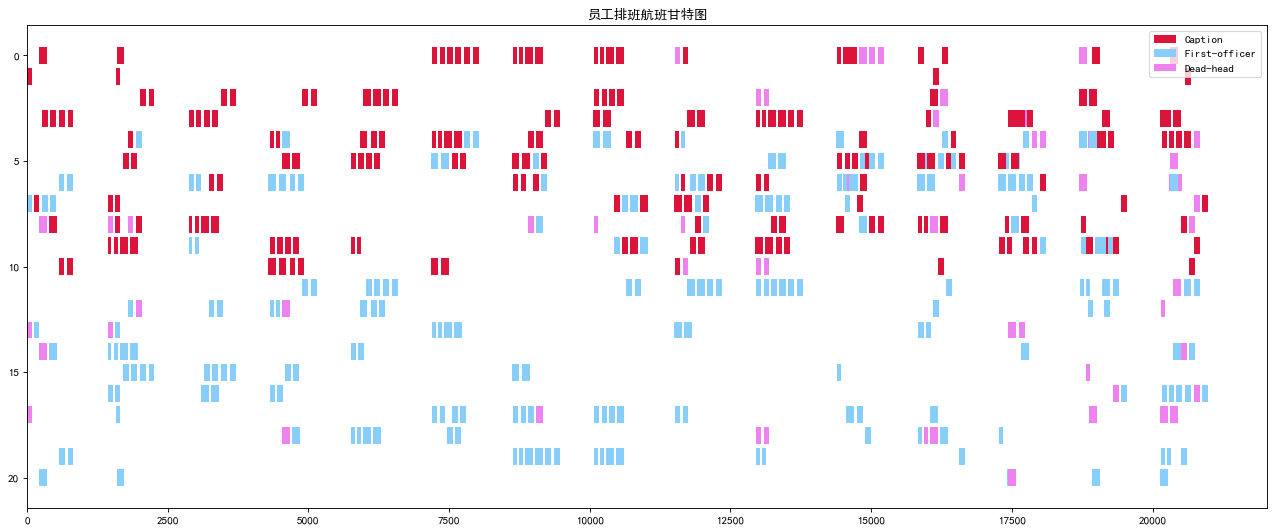

In [55]:
rv.draw_ef_gantt(save='results/q3_a.png')